In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Neural Networks

### Binary Classification with 3 Artificial Neurons

In our binary classification task, we used the function  $F = f(\mathbf{X},\mathbf{Y})=A\mathbf{X}+B\mathbf{Y}+C$. This function corresponds to a simplified neuron without the activation function. Its inputs are $\mathbf{X}$ and $\mathbf{Y}$, their corresponding weights are $A$ and $B$, and $C$ represents the bias.

A neural network works by connecting multiple neurons in a network. Unlike a single neuron, a network of neurons is capable of creating smoother, non-linear decision boundaries between data points belonging to different classes we are interested in predicting. Our example network contains 5 neurons, distributed in 3 layers. The first layer contains two neurons which are our data points, and is called the __input layer__. The second layer, called a __hidden layer__, comprises of 2 identical neurons, $n_1$, and $n_2$, each multiplying our data points $\mathbf{X}$ and $\mathbf{Y}$ from the input layer by a set of randomly initialised parameters $A_i, B_i, C_i$, where $i=1,2$. The third layer, called the __output layer__ contains a single neuron $s$ that multiplies the outputs $N_1$, and $N_2$ of the previous neurons  by a new set of parameters $A_3$, $B_3$, and $C_3$, and outputs the result $S$, like shown on the following diagram.

<img src="https://github.com/skyezzzhang/machineintelligence/blob/master/img/neural_networks_23.png?raw=1" alt="drawing" width="650"/>

In machine learning this scheme is usually simplified as following:

<img src="https://github.com/skyezzzhang/machineintelligence/blob/master/img/neural_networks_24.png?raw=1" alt="drawing" width="400"/>

As an activation function we will again be using sigmoid function $sig(x)$ defined as:

$$
sig(x) = \frac{1}{1+e^{-x}}\\
$$

Implement the `sigmoid(x)` function in code:

In [2]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

Our dataset contains several 2D points:

In [3]:
data = np.array([[ 1.2, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-0.0, 1.1],
                 [ 2.1,-1.3],
                 [ 3.1,-1.8],
                 [ 1.1,-0.1],
                 [ 1.5,-2.2],
                 [ 4.0,-1.0]])

For each data point, there is an associated label `1` or `-1`:

In [4]:
labels = np.array([  1,
                    -1,
                     1,
                    -1,
                    -1,
                     1,
                    -1,
                     1,
                    -1,
                    -1])

A python `plot_data` can be used to plot the data:

In [5]:
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    nudge = 0.08
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()

Use the function `plot_data` to plot our data points and their labels

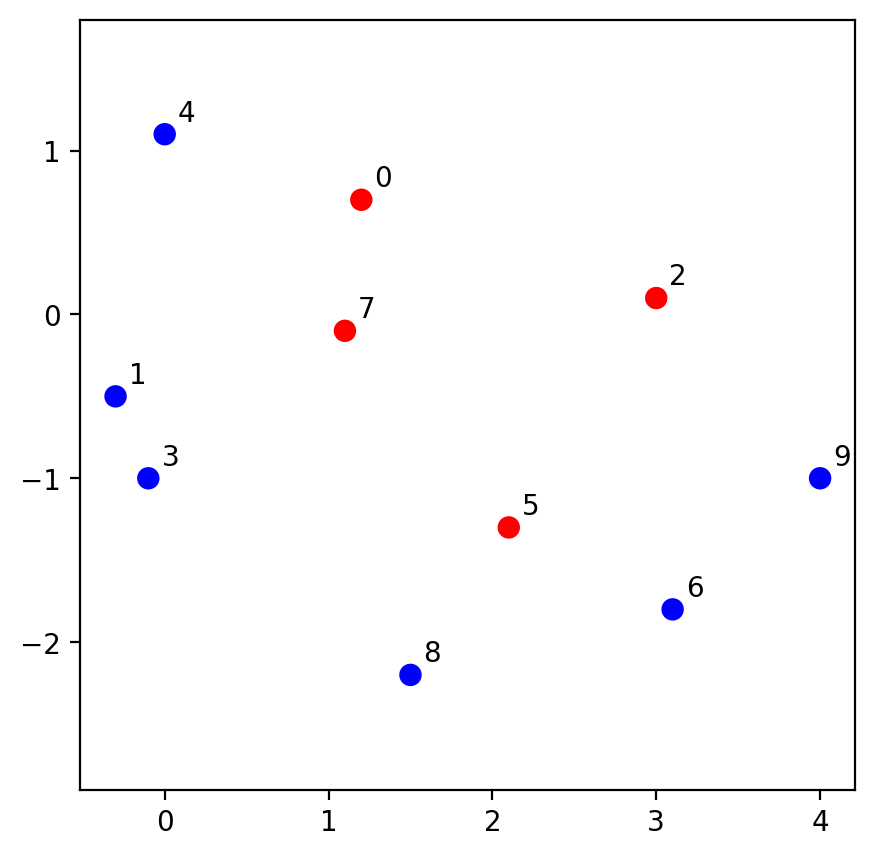

In [6]:
plot_data(data, labels)

`np.random.normal(size=x)` is a numpy function that can generate a number of normally distributed random values.

In [7]:
np.random.normal(size=5)

array([-1.246,  1.485, -0.432,  0.017, -0.407])

Use the function to initialise the initial values for all the weights and biases of the neural network:

In [24]:
rnd = np.random.normal(size=9)
A1 = rnd[0]
A2= rnd[1]
A3= rnd[2]
B1= rnd[3]
B2= rnd[4]
B3= rnd[5]
C1= rnd[6]
C2= rnd[7]
C3= rnd[8]

Print some of the values

In [11]:
A1, B1, C1

(-0.036276439135989956, 0.7673323116843831, -0.7432741792974198)

#### Computing the forward pass

Take the first data point `[1.2, 0.7]` and store it in the variables `X` and `Y`:

In [14]:
X, Y = data[0]
X, Y

(1.2, 0.7)

Initialise the variable `label` and store the corresponding label for the datapoint

In [17]:
label = labels[0]

Compute the forward pass (output of the whole network) and keep the intermediate steps `z1`, `z2`, `N1` and `N2` in separate variables:

In [34]:
z1 = A1*X + B1*Y + C1
z2 = A2*X + B2*Y +C2
N1 = sigmoid(z1)
N2 = sigmoid(z2)
S = A3*N1 + B3*N2 +C3
S

-0.6951086212140796

Initialise the variable `sign` and set it to `1` or `-1` dependent on the output of the network and the label:

In [35]:
sign = 1 if (label == 1 and S < 1) else -1 if (label == -1 and S > -1) else 0

In [36]:
sign

1

#### Computing the backward pass

During the lecture we computed the partial derivatives for this network:

<img src="https://github.com/skyezzzhang/machineintelligence/blob/master/img/neural_networks_23.png?raw=1" alt="drawing" width="650"/>

The partial derivatives for the neuron $s$ are:

\begin{align*}
\frac{\partial S}{\partial A_3} &=N_1; &\frac{\partial S}{\partial B_3} &=N2; &\frac{\partial S}{\partial C_3}&=1;\\\\
\end{align*}

Initialise the variables `dA3`, `dB3` and `dC3` and store the appropriate derivative values:

In [37]:
dA3, dB3, dC3 = N1, N2, 1

The partial derivatives for the neuron $n_1$ are:

\begin{align*}
\frac{\partial S}{\partial A_1} &=A_3\cdot N_1(1-N_1)\cdot X; &\frac{\partial S}{\partial B_1} &=A_3\cdot N_1(1-N_1)\cdot Y; &\frac{\partial S}{\partial C_1}&=A_3\cdot N_1(1-N_1)\\\\
\end{align*}

Initialise the variables `dA1`, `dB1` and `dC1` and store the appropriate derivative values:

In [39]:
dz1 = A3 * N1 * (1-N1)
dA1, dB1, dC1 = dz1 * X, dz1 * Y, dz1

The partial derivatives for the neuron $n_2$ are:

\begin{align*}
\frac{\partial S}{\partial A_2} &=B_3\cdot N_2(1-N_2)\cdot X; &\frac{\partial S}{\partial B_2} &=B_3\cdot N_2(1-N_2)\cdot Y; &\frac{\partial S}{\partial C_2}&=B_3\cdot N_2(1-N_2)\\\\
\end{align*}

Initialise the variables `dA2`, `dB2` and `dC2` and store the appropriate derivative values:

In [41]:
dz2 = B3 * N2 * (1-N2)
dA2, dB2, dC2 = dz2 * X, dz2 * Y, dz2

Introduce the variable `step_size` to hold a very small number and minimise/maximise the weights and biases:

In [42]:
# X_new = X_old + sign * dY/dX * step_size
step_size = 0.01
A1 = A1 + sign *dA1 * step_size
A2 = A2 + sign *dA2 * step_size
A3 = A3 + sign *dA3 * step_size
B1 = B1 + sign *dB1 * step_size
B2 = B2 + sign *dB2 * step_size
B3 = B3 + sign *dB3 * step_size
C1 = C1 + sign *dC1 * step_size
C2 = C2 + sign *dC2 * step_size
C3 = C3 + sign *dC3 * step_size

Evaluate the  function $f(\mathbf{X},\mathbf{Y})$, with the updated parameters $A_1—C_3$:

In [43]:
z1 = A1*X + B1*Y + C1
z2 = A2*X + B2*Y +C2
N1 = sigmoid(z1)
N2 = sigmoid(z2)
S_new = A3*N1 + B3*N2 +C3

In [44]:
S, S_new

(-0.6951086212140796, -0.6811805227803966)

This result should better then the original result!

***

#### Exercise 1:
Write a simple algorithm for binary classification by using the previously written code:

In [90]:
step_size = 0.01
rnd = np.random.normal(size=9)

A1 = rnd[0]
A2= rnd[1]
A3= rnd[2]
B1= rnd[3]
B2= rnd[4]
B3= rnd[5]
C1= rnd[6]
C2= rnd[7]
C3= rnd[8]

for i in range(100000):
    index = np.random.randint(data.shape[0])
    X, Y = data[index]
    current_label = labels[index]
    z1 = A1*X + B1*Y + C1
    z2 = A2*X + B2*Y +C2
    N1 = sigmoid(z1)
    N2 = sigmoid(z2)
    S = A3*N1 + B3*N2 +C3

    #minimize or maximize
    sign = 1 if (current_label == 1 and S < 1) else -1 if (current_label == -1 and S > -1) else 0

    #neuron s
    dA3, dB3, dC3 = N1, N2, 1

    #neuron n1
    dz1 = A3 * N1 * (1-N1)
    dA1, dB1, dC1 = dz1 * X, dz1 * Y, dz1

    #neuron n2
    dz2 = B3 * N2 * (1-N2)
    dA2, dB2, dC2 = dz2 * X, dz2 * Y, dz2

    A1 = A1 + sign *dA1 * step_size
    A2 = A2 + sign *dA2 * step_size
    A3 = A3 + sign *dA3 * step_size
    B1 = B1 + sign *dB1 * step_size
    B2 = B2 + sign *dB2 * step_size
    B3 = B3 + sign *dB3 * step_size
    C1 = C1 + sign *dC1 * step_size
    C2 = C2 + sign *dC2 * step_size
    C3 = C3 + sign *dC3 * step_size

   # print(f'X:{X}, Y:{Y}:label:{current_label},output:{S}, sign:{sign}')

In [91]:
for i in range(data.shape[0]):
  X, Y = data[i]
  current_label = labels[i]
  z1 = A1*X + B1*Y + C1
  z2 = A2*X + B2*Y +C2
  N1 = sigmoid(z1)
  N2 = sigmoid(z2)
  S = A3*N1 + B3*N2 +C3
  if(S>=1):
    predicted_label = 1
  if(S<=-1):
    predicted_label = -1
  print(f'data point{i+1}, real label {current_label}, predicted label {predicted_label}, prediction: {current_label==predicted_label}')

data point1, real label 1, predicted label 1, prediction: True
data point2, real label -1, predicted label -1, prediction: True
data point3, real label 1, predicted label 1, prediction: True
data point4, real label -1, predicted label -1, prediction: True
data point5, real label -1, predicted label -1, prediction: True
data point6, real label 1, predicted label 1, prediction: True
data point7, real label -1, predicted label -1, prediction: True
data point8, real label 1, predicted label 1, prediction: True
data point9, real label -1, predicted label -1, prediction: True
data point10, real label -1, predicted label -1, prediction: True


In [55]:
X, Y,  current_label

(1.1, -0.1, 1)

------

#### A simple neural network algorithm

In [92]:
def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx,yy,np.ones(xx.shape))

def eval_accuracy_neural(params, data, labels):
    A1, A2, A3, B1, B2, B3, C1, C2, C3 = params
    num_correct = 0;
    data_len = data.shape[0]

    for i in range(data_len):
        X,Y = data[i]
        true_label = labels[i]
        output = A3*sigmoid(A1*X + B1*Y + C1) + B3*sigmoid(A2*X + B2*Y + C2) + C3
        predicted_label = 1 if output > 1 else -1 if output < -1 else 0

        if (predicted_label == true_label):
            num_correct += 1
    return num_correct / data_len

def plot_neural_simple(params, grid,data, labels, iteration, accuracy):
    nudge = 0.06
    A1, A2, A3, B1, B2, B3, C1, C2, C3 = params
    xx,yy,Z = grid

    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            X, Y = xx[i][j],yy[i][j]
            output = A3*sigmoid(A1*X + B1*Y + C1) + B3*sigmoid(A2*X + B2*Y + C2) + C3
            predicted_label = 1 if output > 1 else -1 if output < -1 else 0
            Z[i][j] = predicted_label

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the iteration {iteration}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    ax.set_aspect('equal')
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

Now we can put these elements together in a working algorithm:

In [93]:
def train_neural_network(data, labels, step_size, no_loops, iter_info):
    rnd = np.random.normal(size=9)

    # hidden layer neuron 1
    A1 = rnd[0] #weight for X
    B1 = rnd[1] #weight for Y
    C1 = rnd[2] #bias

    # hidden layer neuron 2
    A2 = rnd[3] #weight for X
    B2 = rnd[4] #weight for Y
    C2 = rnd[5] #bias

    # output layer neuron
    A3 = rnd[6] #weight for n1
    B3 = rnd[7] #weight for n2
    C3 = rnd[8] # bias

    grid = create_meshgrid(data)

    for i in range(no_loops):
        # get a single random data point
        index = np.random.randint(data.shape[0])
        # get X, Y of that data point and its label
        X,Y = data[index]
        label = labels[index]

        # forward pass
        N1 = sigmoid(A1*X + B1*Y + C1) # 1st neuron
        N2 = sigmoid(A2*X + B2*Y + C2) # 2nd neuron
        S = A3*N1 + B3*N2 + C3 # final activation

        sign = 1 if (label == 1 and S < 1) else -1 if (label == -1 and S > -1) else 0

        # backpropagating through the network
        # partial derivatives of the neuron s
        dA3, dB3, dC3 = N1, N2, 1
        # partial derivatives of the neuron n1
        dz1 = A3*N1*(1-N1)
        dA1, dB1, dC1 = dz1*X, dz1*Y, dz1
        # partial derivatives of the neuron n2
        dz2 = B3*N2*(1-N2)
        dA2, dB2, dC2 = dz2*X, dz2*Y, dz2

        # finally, do the parameter update
        step_size = 0.01
        A1 += sign * dA1 * step_size
        B1 += sign * dB1 * step_size
        C1 += sign * dC1 * step_size
        A2 += sign * dA2 * step_size
        B2 += sign * dB2 * step_size
        C2 += sign * dC2 * step_size
        A3 += sign * dA3 * step_size
        B3 += sign * dB3 * step_size
        C3 += sign * dC3 * step_size

        params = A1, A2, A3, B1, B2, B3, C1, C2, C3

        if (i%iter_info==0):
            accuracy = eval_accuracy_neural(params,data,labels)
            plot_neural_simple(params,grid, data, labels, i, accuracy)

    return (A1, A2, A3, B1, B2, B3, C1, C2, C3)

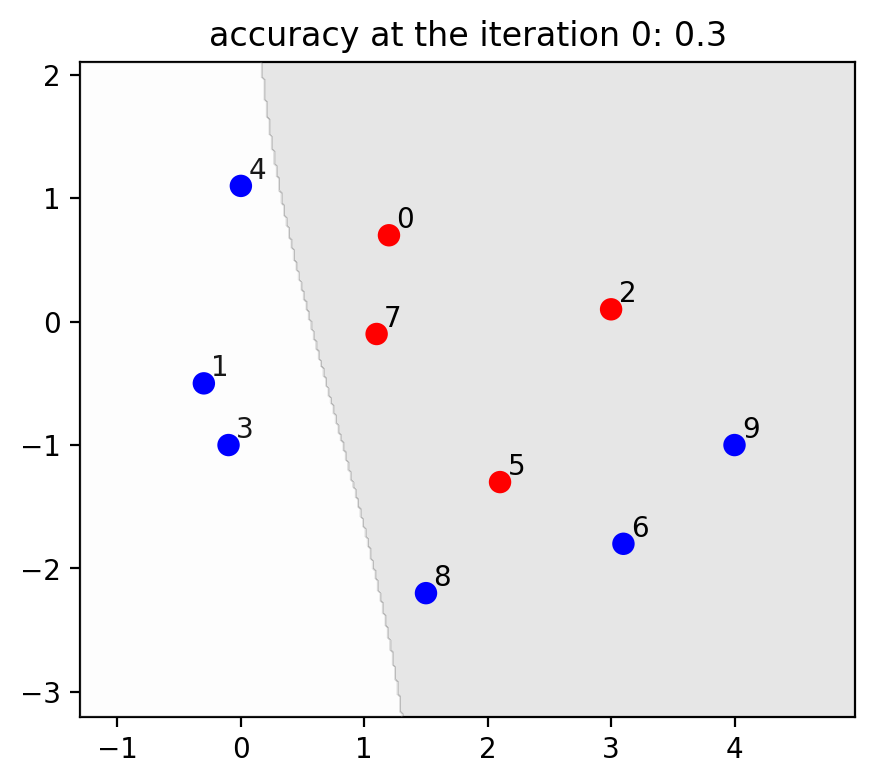

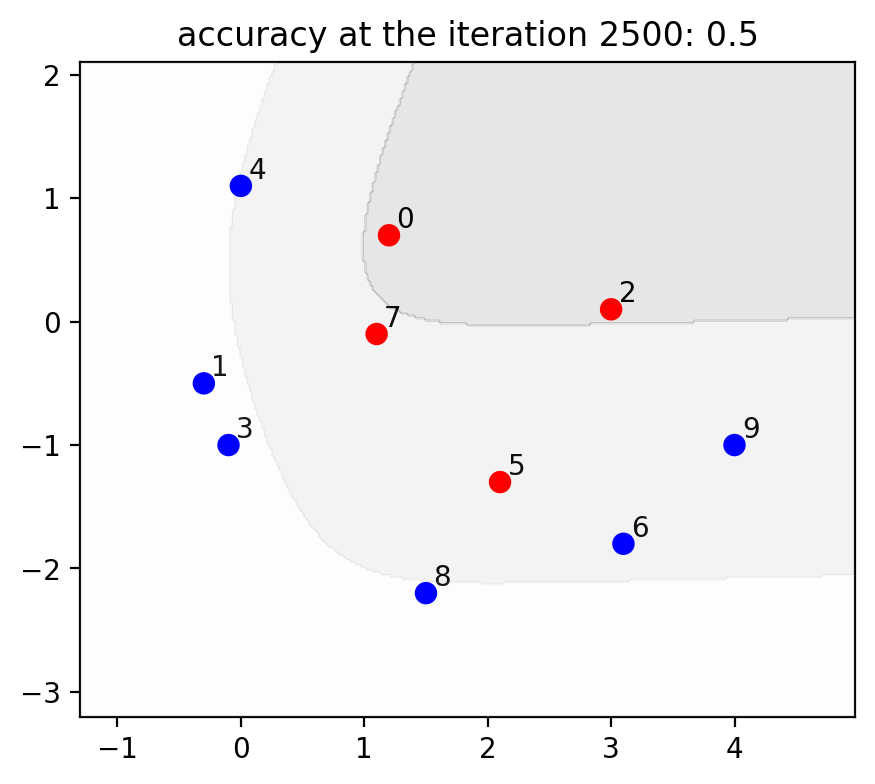

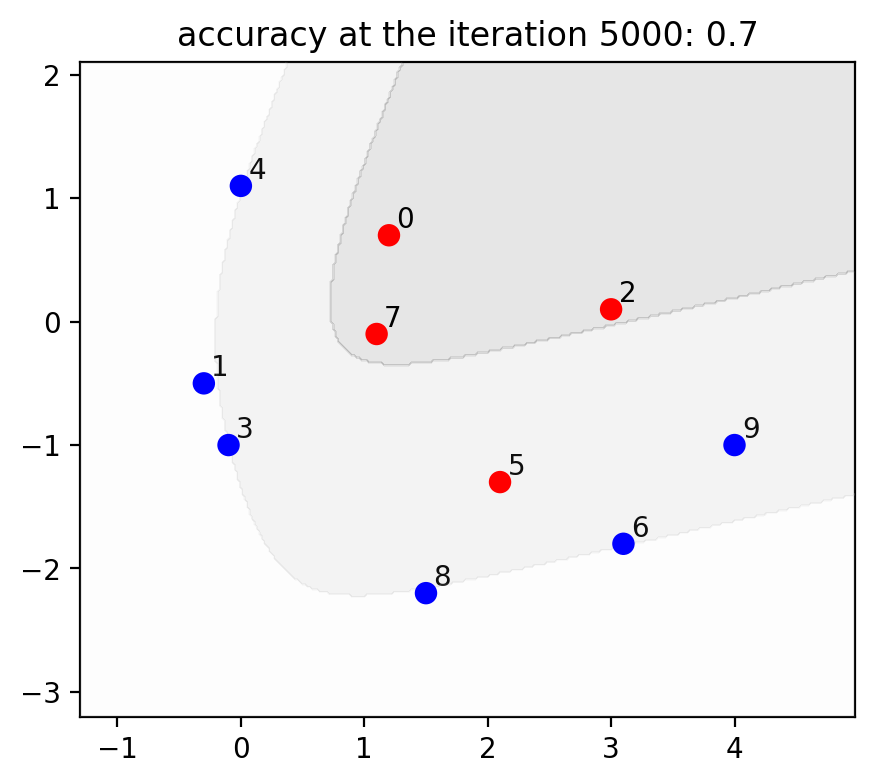

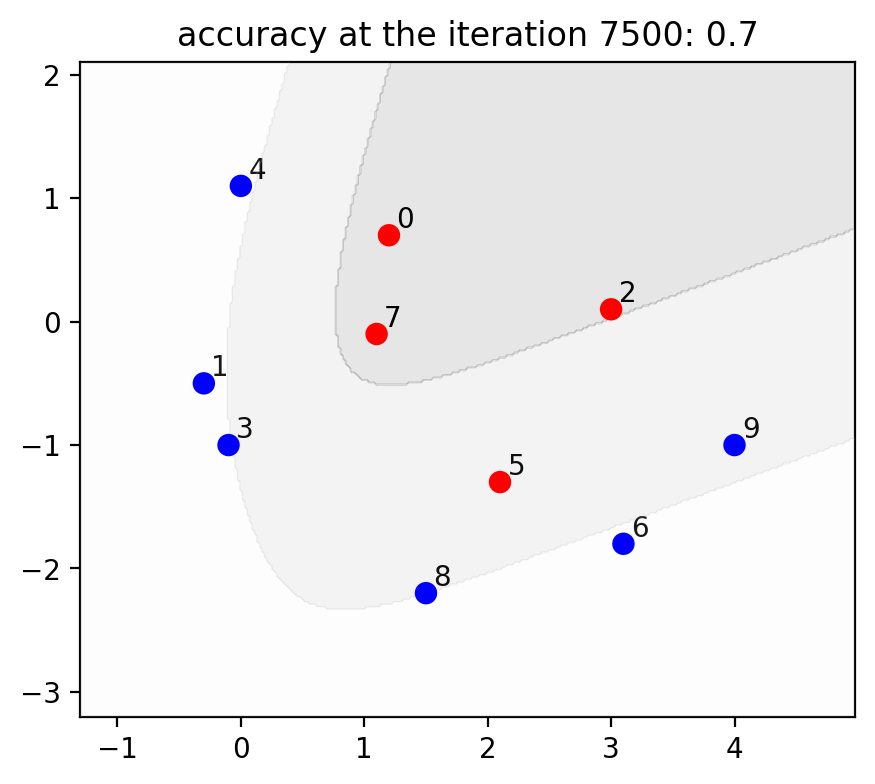

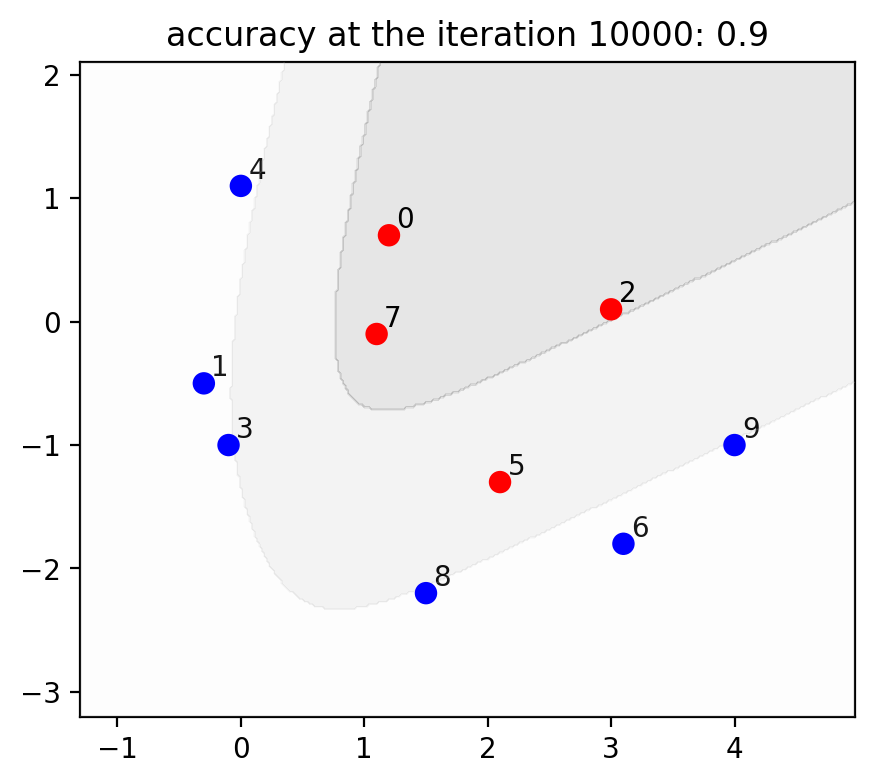

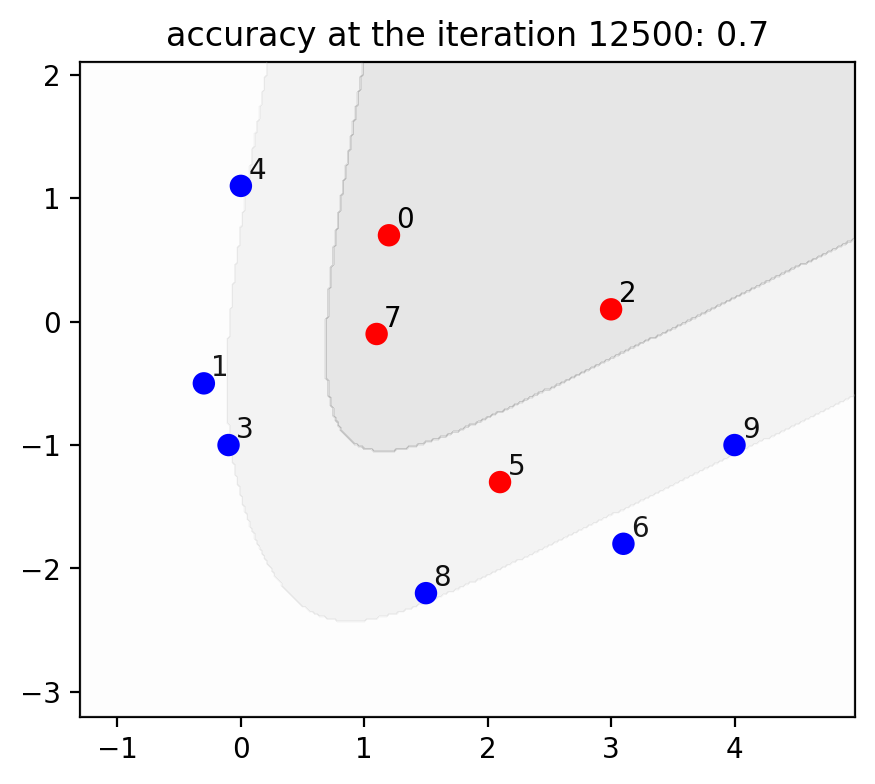

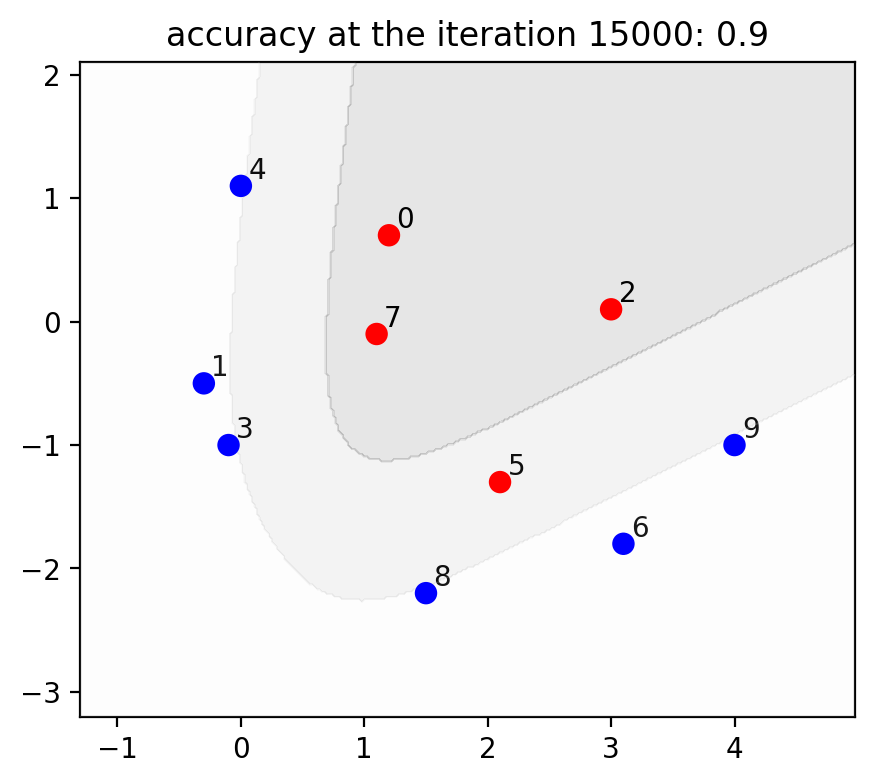

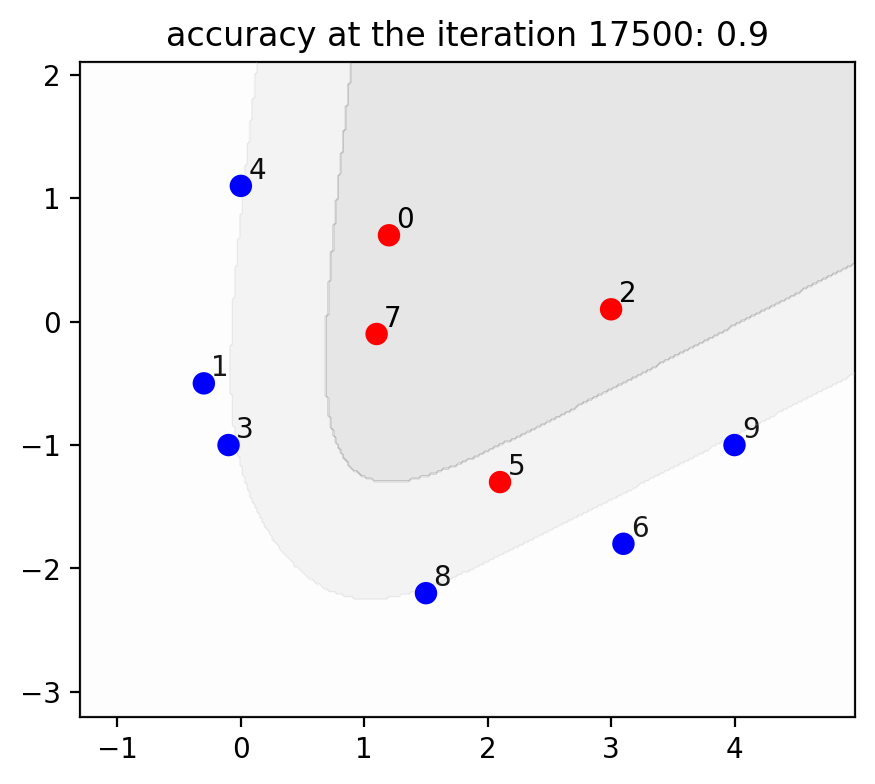

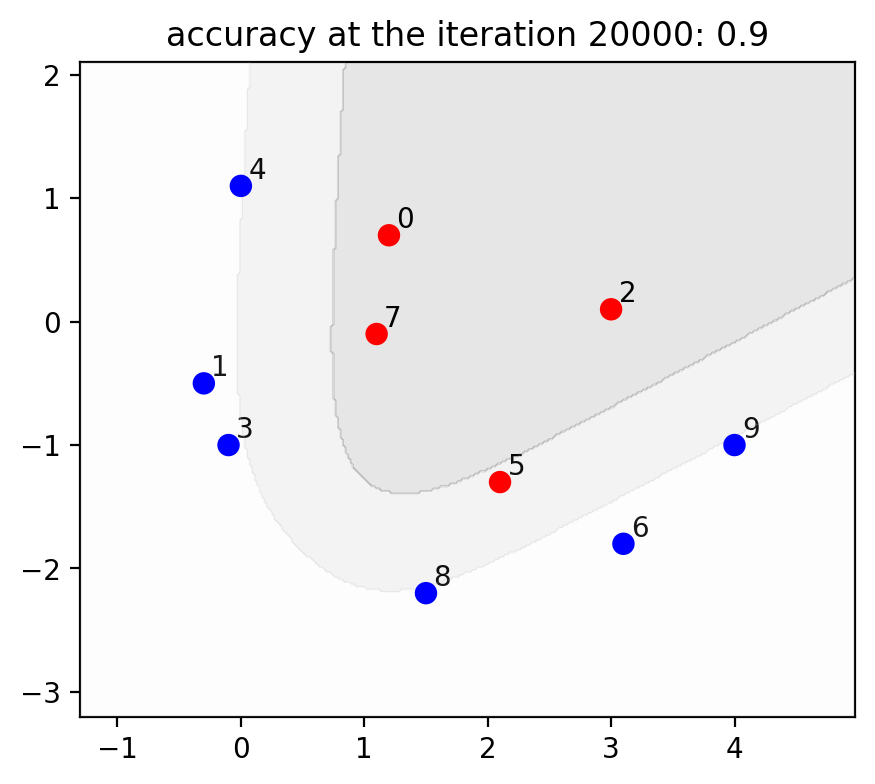

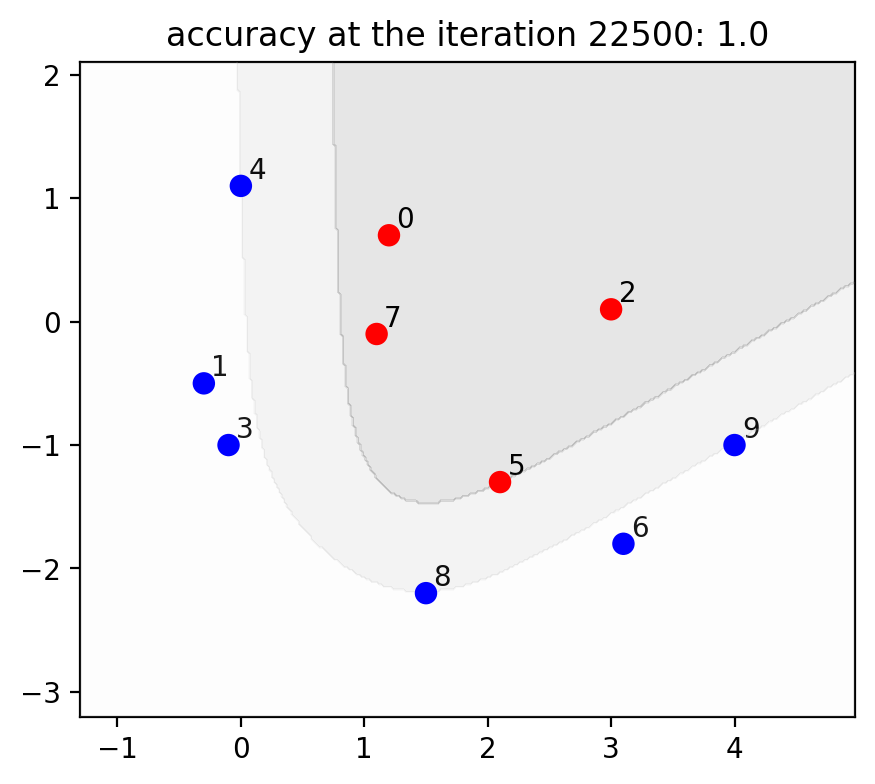

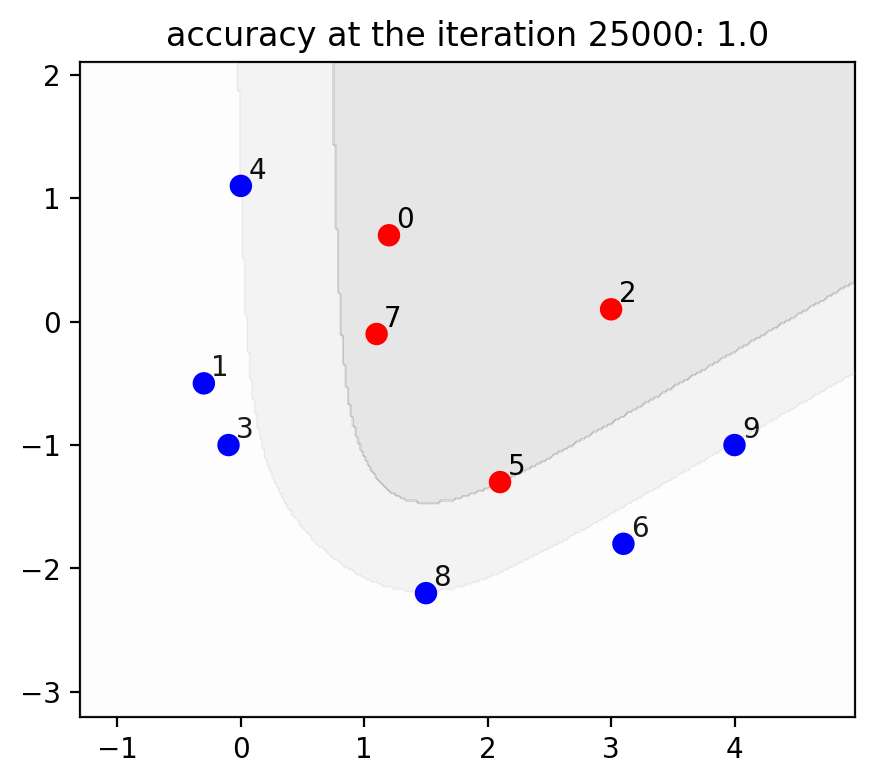

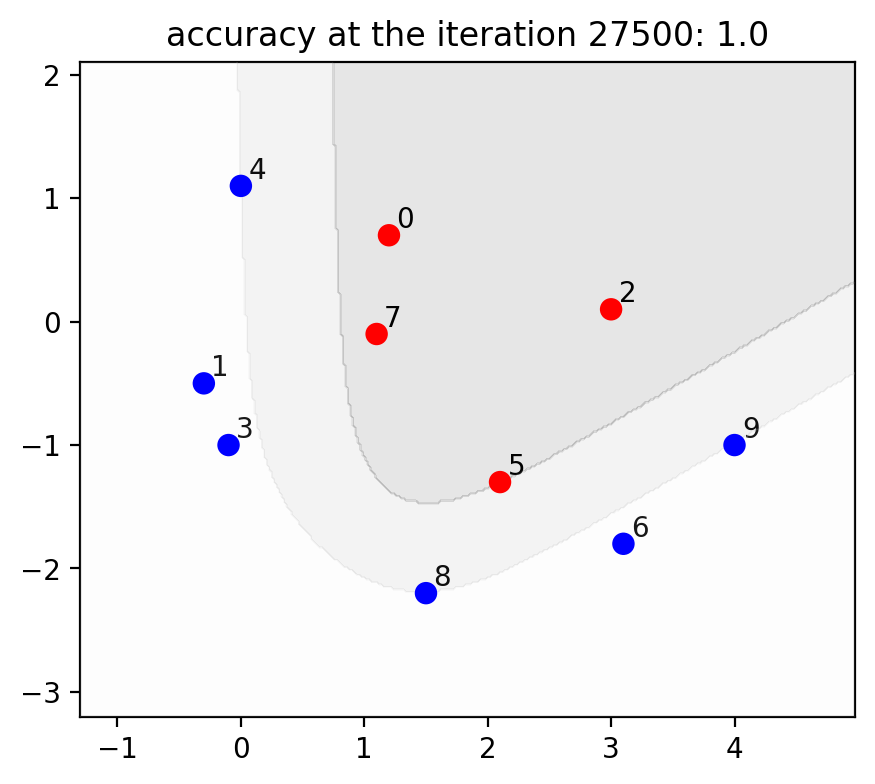

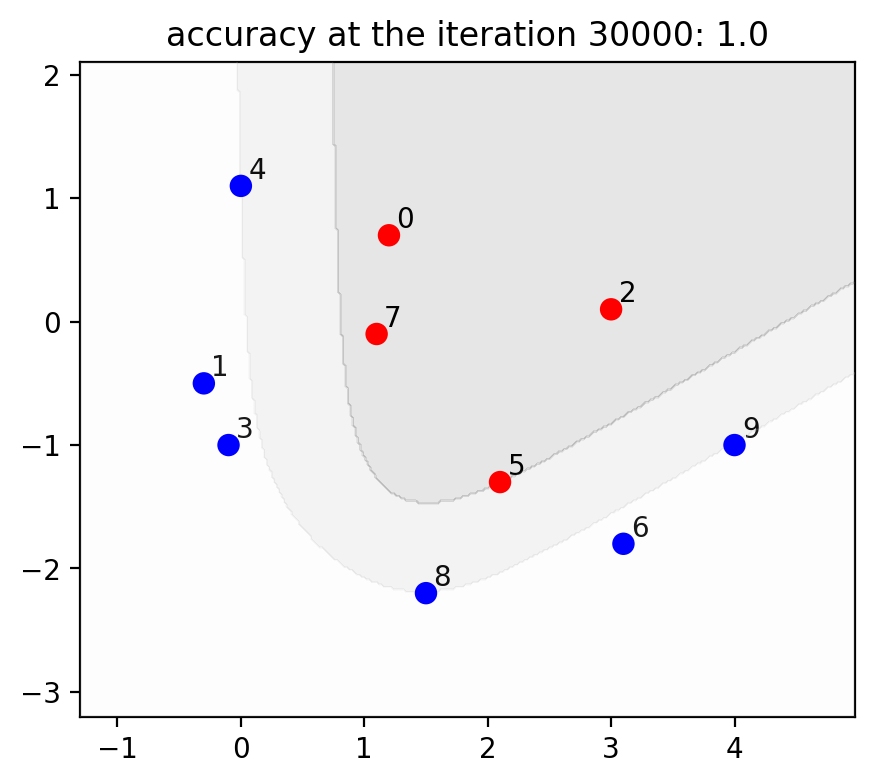

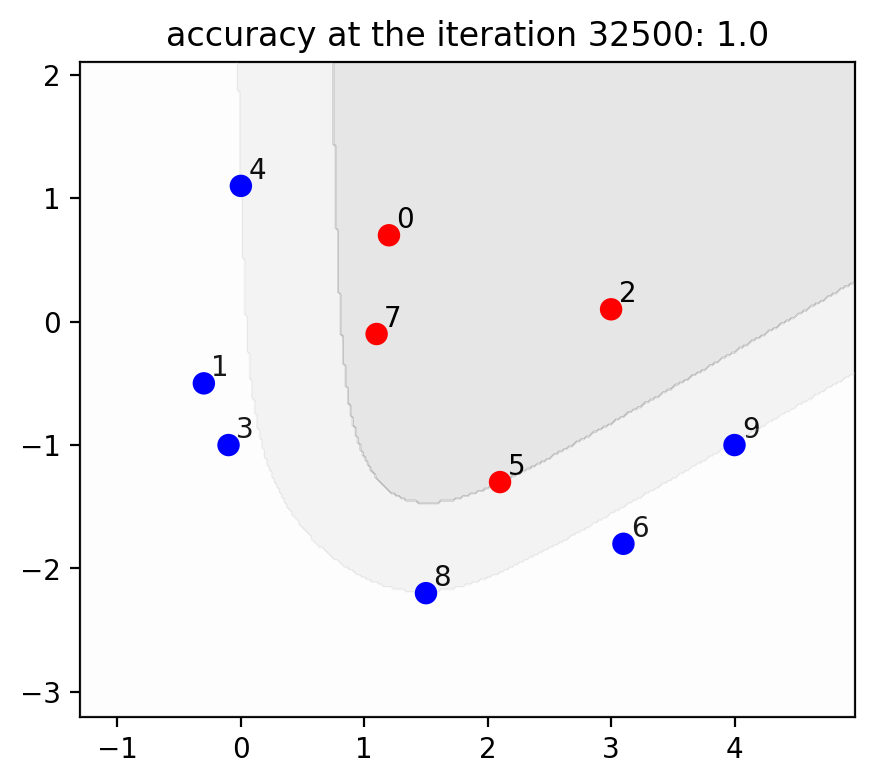

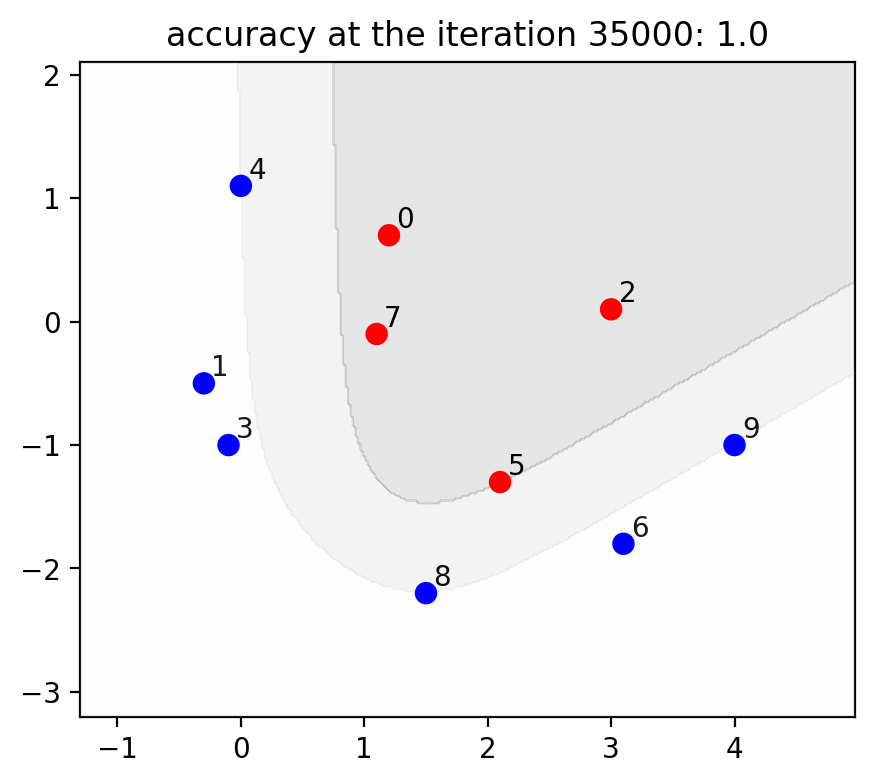

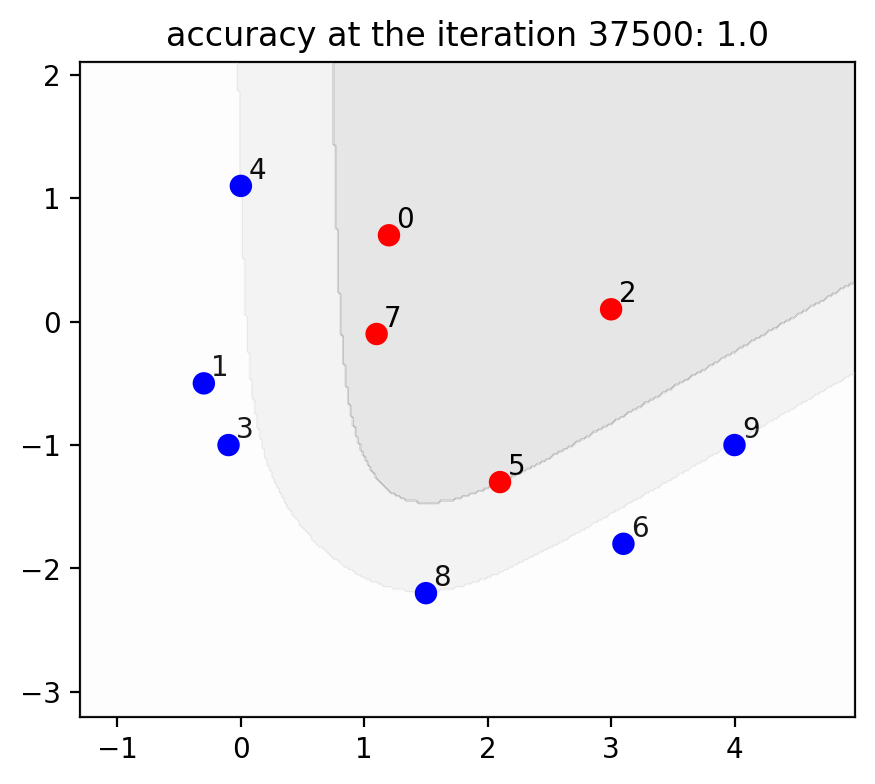

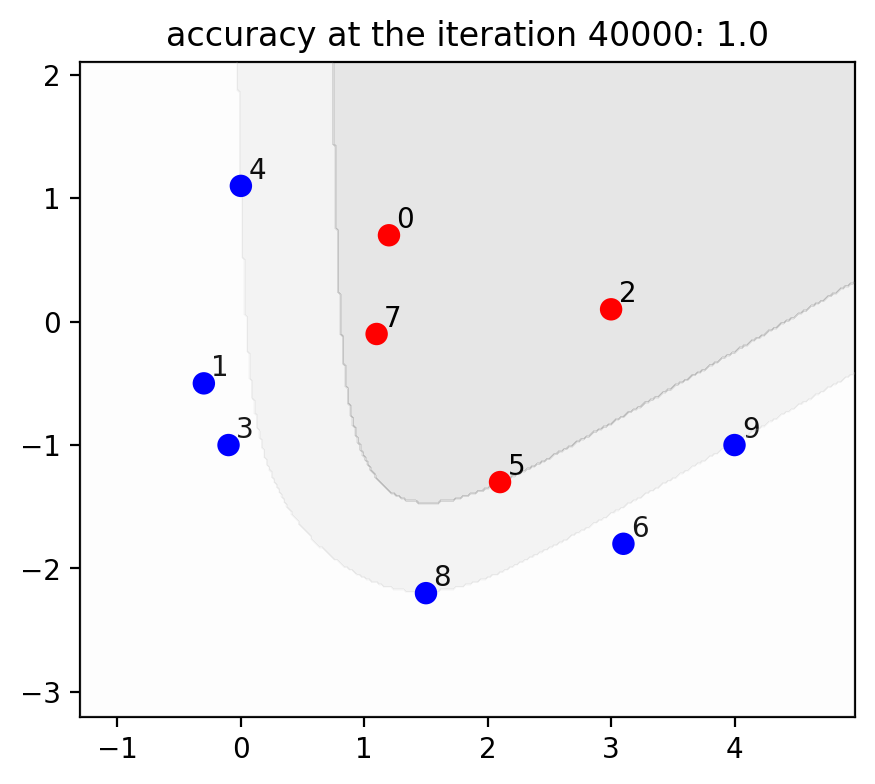

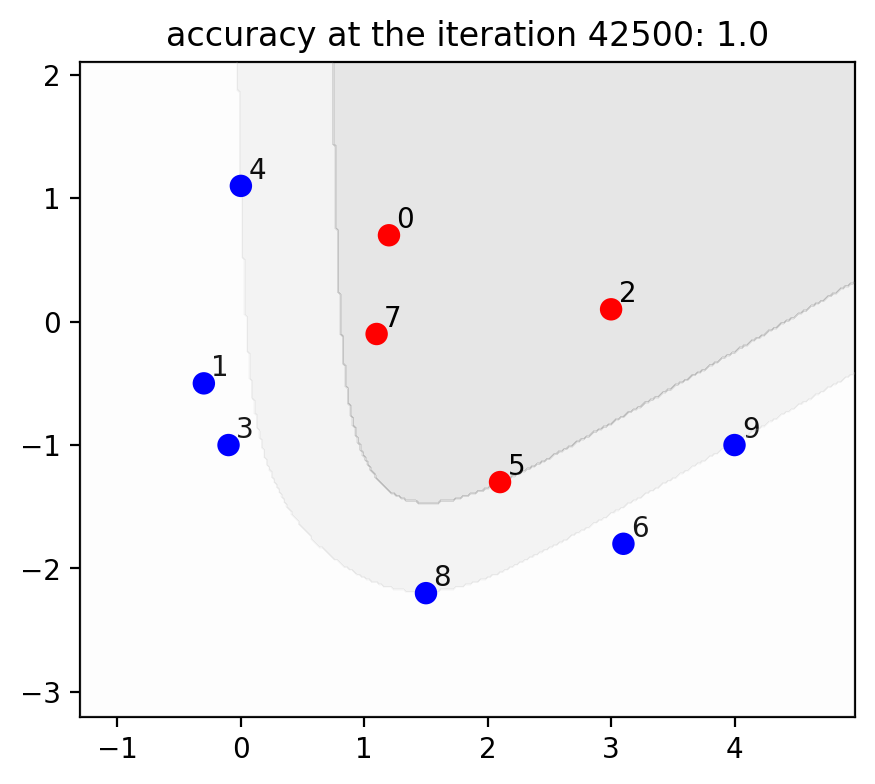

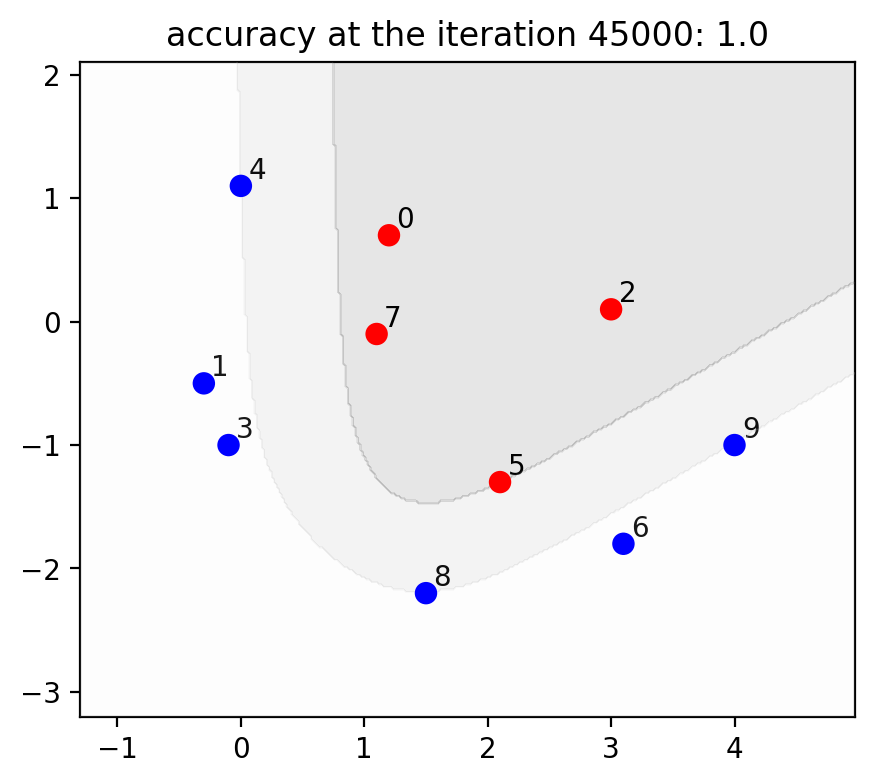

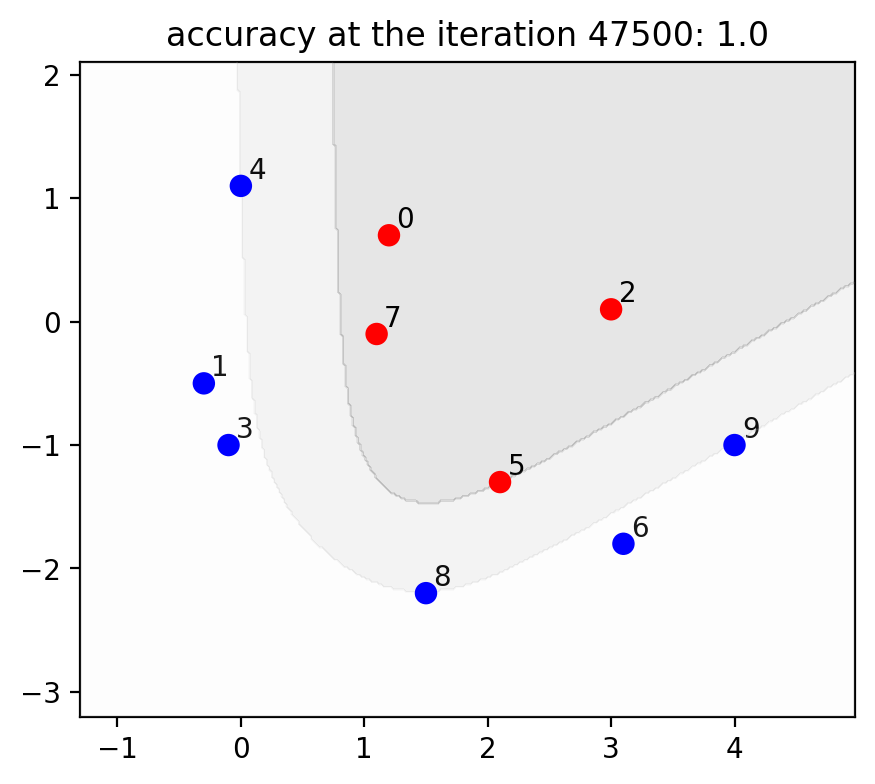

In [96]:
train = train_neural_network(data, labels, 0.01, 50000, 2500)

In [95]:
A1,A2,A3,B1,B2,B3,C1,C2,C3 = train
for i, ((X,Y), label) in enumerate(zip(data, labels)):
    output = A3*sigmoid(A1*X + B1*Y + C1) + B3*sigmoid(A2*X + B2*Y + C2) + C3
    predicted_label = 1 if output > 1 else -1 if output < -1 else 0
    print (f'''data point {i}: real label : {label}, pred. label: {predicted_label}, prediction: {(label==predicted_label)}''')

data point 0: real label : 1, pred. label: 1, prediction: True
data point 1: real label : -1, pred. label: -1, prediction: True
data point 2: real label : 1, pred. label: 1, prediction: True
data point 3: real label : -1, pred. label: -1, prediction: True
data point 4: real label : -1, pred. label: -1, prediction: True
data point 5: real label : 1, pred. label: 0, prediction: False
data point 6: real label : -1, pred. label: 0, prediction: False
data point 7: real label : 1, pred. label: 1, prediction: True
data point 8: real label : -1, pred. label: 0, prediction: False
data point 9: real label : -1, pred. label: 0, prediction: False
